In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# === 1. Load Data ===
with open("final_labeled_questions.json", "r") as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(data)
print(f"Loaded {len(df)} rows")
print(df.head())

Loaded 1000 rows
                                            question  \
0  Rocco stores his coins in piles of 10 coins ea...   
1  Which of the following statements about embryo...   
2  Which of the following is essential to societa...   
3  The Chrysler Building has 11 more floors than ...   
4  Lauren sent 65 pieces of mail on Monday, 10 mo...   

                                              answer  binary  multiclass  \
0  Each pile has 10 coins, so he has:\n10 * 4 * $...       1           3   
1                                                  2       0           2   
2                                                  1       0           2   
3  Let L = Leeward Center\nChrysler = L + <<+11=1...       1           3   
4  Lauren sent 65 + 10 = <<65+10=75>>75 pieces of...       1           3   

            subject                                            choices  
0               NaN                                                NaN  
1   college_biology  [The presence of yolk 

In [4]:
# === 2. Basic Info ===
print("\n--- Dataset Overview ---")
print(df.info())
print("\nMissing values:\n", df.isna().sum())


--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    1000 non-null   object
 1   answer      1000 non-null   object
 2   binary      1000 non-null   int64 
 3   multiclass  1000 non-null   int64 
 4   subject     334 non-null    object
 5   choices     334 non-null    object
dtypes: int64(2), object(4)
memory usage: 47.0+ KB
None

Missing values:
 question        0
answer          0
binary          0
multiclass      0
subject       666
choices       666
dtype: int64


In [5]:
# === 3. Binary and Multiclass Distributions ===
print("\nBinary label distribution:")
print(df['binary'].value_counts())
print("\nMulticlass label distribution:")
print(df['multiclass'].value_counts())


Binary label distribution:
binary
0    506
1    494
Name: count, dtype: int64

Multiclass label distribution:
multiclass
3    406
1    355
2    151
4     66
5     22
Name: count, dtype: int64


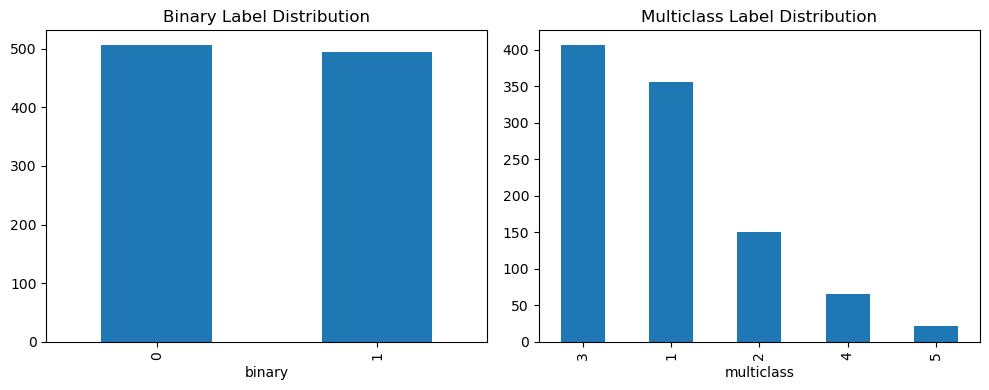

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df['binary'].value_counts().plot(kind='bar', ax=ax[0], title='Binary Label Distribution')
df['multiclass'].value_counts().plot(kind='bar', ax=ax[1], title='Multiclass Label Distribution')
plt.tight_layout()
plt.show()

In [7]:
# === 4. Relationship Between Binary and Multiclass ===
print("\nCrosstab between binary and multiclass:")
crosstab = pd.crosstab(df['binary'], df['multiclass'])
print(crosstab)


Crosstab between binary and multiclass:
multiclass    1    2    3   4   5
binary                           
0           355  151    0   0   0
1             0    0  406  66  22


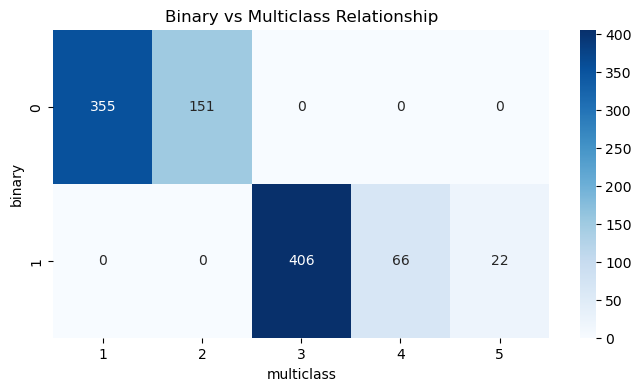

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(crosstab, annot=True, cmap="Blues", fmt='d')
plt.title("Binary vs Multiclass Relationship")
plt.show()

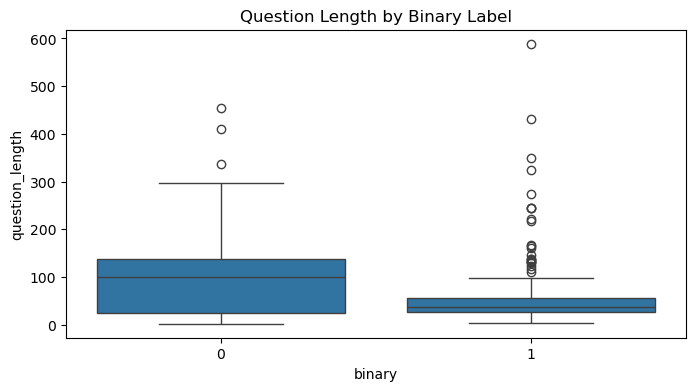

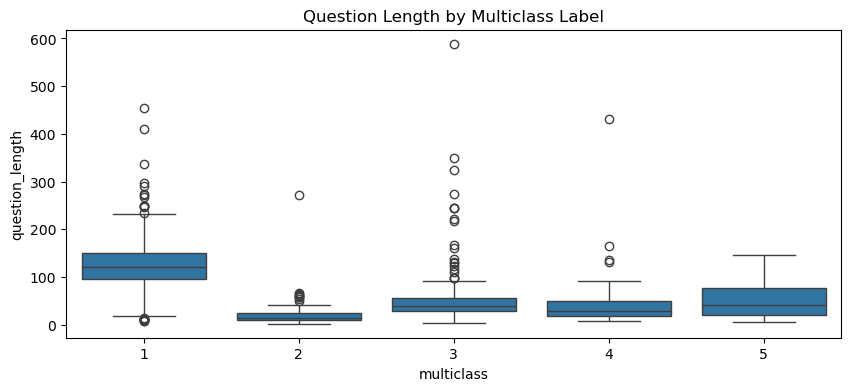

In [9]:
# === 5. Question Length Analysis ===
df['question_length'] = df['question'].apply(lambda x: len(x.split()))


plt.figure(figsize=(8,4))
sns.boxplot(x='binary', y='question_length', data=df)
plt.title('Question Length by Binary Label')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x='multiclass', y='question_length', data=df)
plt.title('Question Length by Multiclass Label')
plt.show()

In [11]:
# === 6. Structural Features ===
df['has_choices'] = df['choices'].notna()
print("\nProportion of questions with multiple-choice options:")
print(df['has_choices'].value_counts(normalize=True))


print("\nCrosstab of Binary vs Has_Choices:")
print(pd.crosstab(df['binary'], df['has_choices']))


if 'subject' in df.columns:
    print("\nSubjects by Multiclass label:")
    print(pd.crosstab(df['multiclass'], df['subject']))


Proportion of questions with multiple-choice options:
has_choices
False    0.666
True     0.334
Name: proportion, dtype: float64

Crosstab of Binary vs Has_Choices:
has_choices  False  True 
binary                   
0              367    139
1              299    195

Subjects by Multiclass label:
subject     abstract_algebra  anatomy  astronomy  business_ethics  \
multiclass                                                          
1                          0        0          1                0   
2                          0        4          0                4   
3                          0        2          5                2   
4                          1        0          0                0   
5                          5        0          0                0   

subject     clinical_knowledge  college_biology  college_chemistry  \
multiclass                                                           
1                            0                0                  0   
2    

In [12]:
# === 7. Summary ===
summary = {
'n_rows': len(df),
'n_unique_multiclass': df['multiclass'].nunique(),
'binary_distribution': df['binary'].value_counts(normalize=True).to_dict(),
'multiclass_distribution': df['multiclass'].value_counts(normalize=True).to_dict(),
}


print("\n=== Summary Statistics ===")
for k, v in summary.items():
    print(f"{k}: {v}")


=== Summary Statistics ===
n_rows: 1000
n_unique_multiclass: 5
binary_distribution: {0: 0.506, 1: 0.494}
multiclass_distribution: {3: 0.406, 1: 0.355, 2: 0.151, 4: 0.066, 5: 0.022}


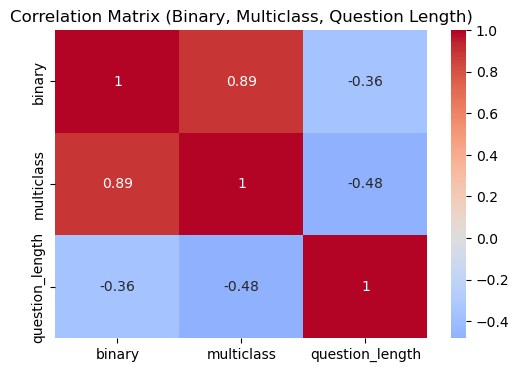

In [13]:
# === 7. Correlation Analysis ===
# For numeric correlation across fields like binary, multiclass, and question_length
corr_cols = ['binary', 'multiclass', 'question_length']
corr_matrix = df[corr_cols].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Binary, Multiclass, Question Length)')
plt.show()

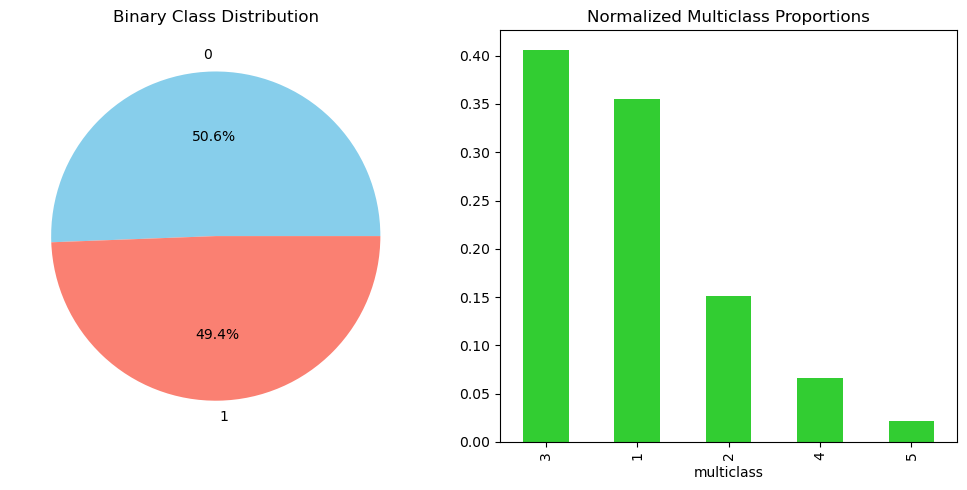


=== Summary Statistics ===
n_rows: 1000
n_unique_multiclass: 5
binary_distribution: {0: 0.506, 1: 0.494}
multiclass_distribution: {3: 0.406, 1: 0.355, 2: 0.151, 4: 0.066, 5: 0.022}


In [15]:
# === 8. Class Imbalance Visualization ===
# Normalized pie charts and proportional bar charts
fig, axes = plt.subplots(1, 2, figsize=(10, 5))


df['binary'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', ax=axes[0], colors=['skyblue', 'salmon'], title='Binary Class Distribution', ylabel='')
df['multiclass'].value_counts(normalize=True).plot(kind='bar', ax=axes[1], color='limegreen', title='Normalized Multiclass Proportions')


plt.tight_layout()
plt.show()


# === 9. Summary ===
summary = {
'n_rows': len(df),
'n_unique_multiclass': df['multiclass'].nunique(),
'binary_distribution': df['binary'].value_counts(normalize=True).to_dict(),
'multiclass_distribution': df['multiclass'].value_counts(normalize=True).to_dict(),
}


print("\n=== Summary Statistics ===")
for k, v in summary.items():
    print(f"{k}: {v}")